## Weather Prediction (Classification)
---

In [35]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

### Preprocessing
---

In [ ]:
#load data
data = pd.read_csv("data/weather_data.csv")

# associate summary with int (label encoding)
def LABEL_ENCODING(col):
    label_encoder = preprocessing.LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])
    data[col].unique()
LABEL_ENCODING("Summary")

# drop columns

x = data.drop([
    "Summary", 
    "Formatted Date", 
    "Precip Type", 
    "Apparent Temperature (C)",
    "Loud Cover", 
    "Daily Summary"], 
    axis=1
)
y = data["Summary"]

# split in train/test (.80/.20)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# save X_test as csv
filepath = "data/sensor_data.csv"
X_test.to_csv(filepath)

# feature scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Train/Predict
---

In [ ]:
# logistic regression
classifier = LogisticRegression(random_state=0, verbose=1)
classifier.fit(X_train, y_train)

# save the model
filename = 'models/logistic_regression.sav'
pickle.dump(classifier, open(filename, 'wb'))

# predict
y_pred = classifier.predict(X_test)
acc_log_reg = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_log_reg}")

In [ ]:
# svm 
classifier = SVC(kernel="rbf", random_state=0, verbose=True)
classifier.fit(X_train, y_train)

# save the model
filename = 'models/svm.sav'
pickle.dump(classifier, open(filename, 'wb'))

# predict
y_pred = classifier.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_svm}")

In [ ]:
# knn
classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
classifier.fit(X_train, y_train)

# save the model
filename = 'models/knn.sav'
pickle.dump(classifier, open(filename, 'wb'))

# predict
y_pred = classifier.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_knn}")

In [ ]:
# bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# save the model
filename = 'models/naive_bayes.sav'
pickle.dump(classifier, open(filename, 'wb'))

# predict
y_pred = classifier.predict(X_test)
acc_bayes = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_bayes}")

In [ ]:
# rf
classifier = RandomForestClassifier(n_estimators=40, random_state=0, verbose=1)
classifier.fit(X_train, y_train)

# save the model
filename = 'models/random_forest.sav'
pickle.dump(classifier, open(filename, 'wb'))

# predict
y_pred = classifier.predict(X_test)
acc_rf = classifier.score(X_test,y_test)
print(f"Accuracy score: {acc_rf}")

### Visualize Model Accuracy
---

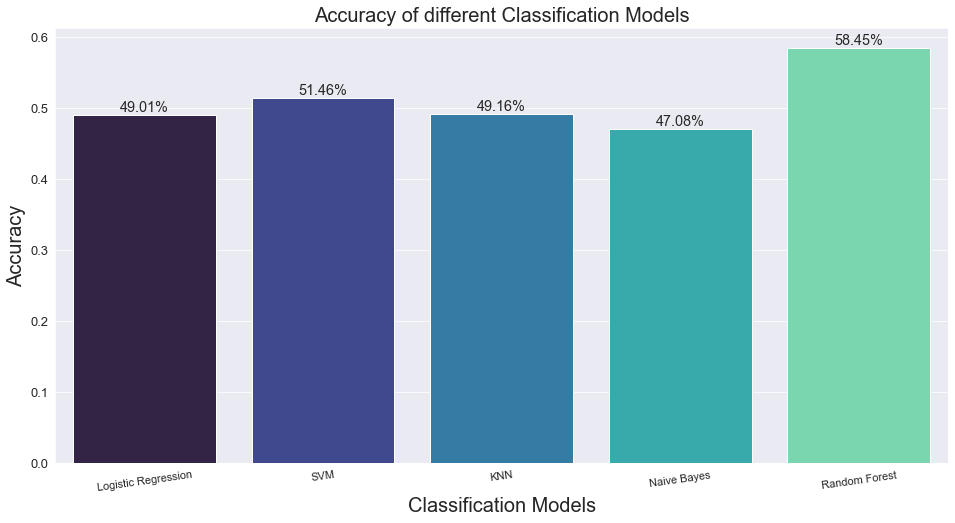

In [42]:
accuracy_scores=[
    acc_log_reg
    ,acc_svm
    ,acc_knn
    ,acc_bayes
    ,acc_rf
]

labels=[
    "Logistic Regression"
    ,"SVM"
    ,"KNN"
    ,"Naive Bayes"
    ,"Random Forest"
]

# plot params / plotting
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(16,8))
ax = sns.barplot(x=labels, y=accuracy_scores, palette = "mako", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center', fontsize = 'x-large')
plt.show()